In [1]:
RU = 4182798
import pandas as pd
import numpy as np
from PIL import Image
import nltk
import os
    
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import string
import re    
    

# nltk.download('rslp')
# nltk.download('stopwords')

def get_data():
    FAKE_PATH = './full_texts/fake'
    TRUE_PATH = './full_texts/true'

    fake = read_files(FAKE_PATH, 'fake')
    true = read_files(TRUE_PATH, 'true')

    true_df = pd.DataFrame(true, columns = ['text', 'label'])
    fake_df = pd.DataFrame(fake, columns = ['text', 'label'])

    df = pd.concat([true_df, fake_df])
    return df


    

def read_files(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                data.append({'text': text, 'label': label})
    return data

def remove_punctuation(text:str) -> str:
    filtered_text = ''.join(char for char in text if char not in string.punctuation)
    
    return filtered_text
    

def remove_special_characters_and_numbers(text: str) -> str:
    """Remove caracteres especiais e números usando expressões regulares"""
    
    text = re.sub(r'\n|\ufeff|”|“', '', text)
    return text

def remove_stop_words(text: str) -> str:
    stop_words = set(stopwords.words('portuguese'))
    
    # Tokenizar o texto em palavras
    words = word_tokenize(text, language='portuguese')
    
    # Lematizar cada palavra e remover as stopwords
    words = [word for word in words if word.isalnum() and word.lower() not in stop_words]
    
    # Juntar as palavras lematizadas de volta em uma string
    return ' '.join(words)

def preprocess(text):
    stemmer = RSLPStemmer()
    stop_words = set(stopwords.words('portuguese'))
    
    # Tokenizar o texto em palavras
    words = word_tokenize(text, language='portuguese')
    
    # Lematizar cada palavra e remover as stopwords
    lemmatized_words = [stemmer.stem(word) for word in words if word.isalnum() and word.lower() not in stop_words]
    
    # Juntar as palavras lematizadas de volta em uma string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

### AQUISIÇÃO

Fazer o download do dataset no link fornecido.

### ESTRUTURAÇÃO
 Carregar o dataset em um Pandas DataFrame. Certifique-se de que seus 
dados foram importados corretamente, sem nenhum erro de acentuação. Este dataset em 
particular pode gerar diversos erros de importação por conta de a língua portuguesa conter 
diversos símbolos menos comuns em inglês, como vírgulas e acentuações.

In [4]:
df = get_data()

### PRÉ-PROCESSAMENTO: 
    
Informações desnecessárias, espaços duplicados e demais 
artefatos irrelevantes ao projeto deverão ser filtrados, para obtenção do dado corretamente 
analisado. Outras técnicas poderão ser necessárias nesta etapa, para um resultado mais 
preciso. Aqui você também deverá separar seus dados em 75% dos textos para treinamento 
e 25% para testes e análise de acurácia.


In [5]:
# # lower
# df['text'] = df['text'].str.lower()

# # removendo pontuação
# df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

# # removendo tudo que não for caracter
# df['text'] = df['text'].apply(lambda x: remove_special_characters_and_numbers(x))

# df['lemmatized_text'] = df['text'].apply(lambda x: preprocess(x))

# df.to_csv('preprocessed/lemmatized_text.csv', index=False, encoding = 'utf-8')

In [6]:
df = pd.read_csv('preprocessed/lemmatized_text.csv')

In [7]:
# 25% teste e 75% treino

TEST_SIZE_4182798 = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    df['lemmatized_text'],
    df['label'],
    test_size=TEST_SIZE_4182798,
    random_state=42
)

### MINERAÇÃO: 

Agrupar os dados de forma a obter estatísticas desejadas das palavras. A 
sugestão aqui é o uso de **TF-IDF** em conjunto com **bigramas**. Utilize a biblioteca Scikit-Learn 
para a geração do TF-IDF.

### MODELAGEM: 
Criação do modelo de classificação que será treinado e depois testado. Este 
modelo deverá resultar em **mais de 85% de acurácia** para ser aceito como resposta correta.

In [8]:
# Pipeline -: TF-IDF com bigrama e redução de features
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('classifier', LGBMClassifier())
])

# Treino do modelo
pipeline.fit(X_train, y_train)

# Previsões
y_pred = pipeline.predict(X_test)

# Desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

if accuracy > 0.85:
    print('Modelo aceitável')

Acurácia: 0.96
Modelo aceitável


### REPRESENTAÇÃO: 
Criar uma forma visual de apresentar os tokens (palavras) usados em 
cada classe (FAKE e REAL). Aqui você deverá usar a biblioteca wordcloud para geração de 
duas nuvens de palavras, uma para cada rótulo.

In [9]:
df['lenght'] = df['text'].apply(lambda x: len(x.split(' ')))

In [10]:
thumb_down_image = np.array(Image.open('thumbs_down.png'))
thumb_up_image = np.array(Image.open('thumbs_up.png'))

In [11]:
wc = WordCloud(background_color="white", mask=thumb_up_image, contour_width=3, contour_color='black')


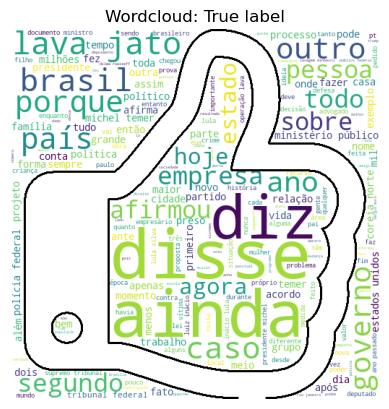

In [12]:
# pegar palavras e filtrar stop words
true = df[df['label']=='true']
true_texts = ' '.join(true['text'])
true_texts = remove_stop_words(true_texts)

wc.generate_from_text(true_texts)
plt.imshow(wc)
plt.ylabel("RU: 4182798" , fontsize=16)
plt.title('Wordcloud: True label')
plt.axis('off');


In [13]:
wc = WordCloud(background_color="white", mask=thumb_down_image, contour_width=3, contour_color='black')


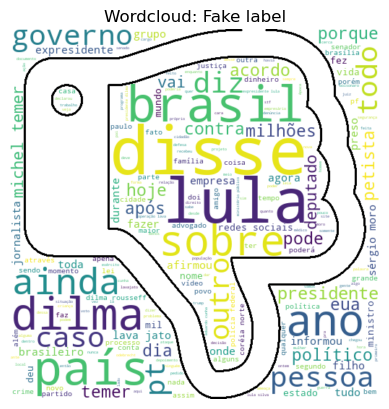

In [14]:
fake = df[df['label']=='fake']
fake_texts = ' '.join(fake['text'])
fake_texts = remove_stop_words(fake_texts)
wc.generate_from_text(fake_texts)

plt.imshow(wc, interpolation ='bilinear')
plt.ylabel("RU: 4182798", fontsize=16 )
plt.title('Wordcloud: Fake label')
plt.axis('off');

### REFINAMENTO: 

Não conseguiu atingir a acurácia desejada? Agora é o momento de voltar 
no seu processo e melhorá-lo. Lembre-se que acurácias muito altas também podem ser um 
sinal de “over training”, que significa que seu modelo foi treinado em excesso e resultará em 
erros com outros tipos de textos que não pertençam ao corpus original. Para o caso deste 
dataset, acurácias acima de 93% geralmente sinalizam a utilização dos textos completos e 
não normalizados, pois os textos marcados como REAL possuem muito mais palavras do que 
os textos marcados como FAKE, causando uma análise por tamanho e não por contexto.

In [15]:
# Analisando diferença de tamanho entre os samples

print('Max Length of Fake Sample: {}'.format(fake['lenght'].max()))
print('Max Length of True Sample: {}'.format(true['lenght'].max()))

print('Average Length of Fake Sample: {}'.format(fake['lenght'].mean()))
print('Average Length of True Sample: {}'.format(true['lenght'].mean()))

Max Length of Fake Sample: 2266
Max Length of True Sample: 7518
Average Length of Fake Sample: 191.20305555555555
Average Length of True Sample: 1098.8794444444445


In [16]:
# Retreinando com o filtro de max_features = 200
# Pipeline -: TF-IDF com bigrama e redução de features
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=200)),
    ('classifier', LGBMClassifier())
])

# Treino do modelo
pipeline.fit(X_train, y_train)

# Previsões
y_pred = pipeline.predict(X_test)

# Desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

if accuracy > 0.85:
    print('Modelo aceitável')

Acurácia: 0.95
Modelo aceitável


### INTERAÇÃO: 
Rode seu notebook do zero novamente, para garantir que todos os comandos 
estão em pleno funcionamento. Garanta que suas imagens de nuvens de palavras estão com 
seu RU e estão apresentando os termos corretamente. Monte o relatório e faça a sua entrega.
